# <p style="text-align:center;">EN3160 Assignment 1 - Codes</p>
## <p style="text-align:center;">210498T</p>

# 1 Implement the intensity transformation

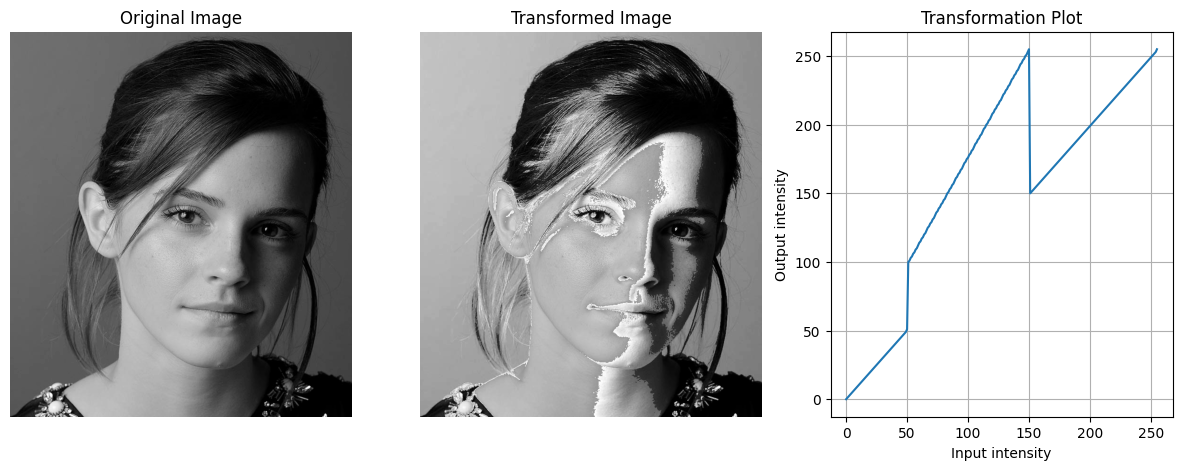

In [78]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gamma_img = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

# # Display the original and transformed images
wm = np.array([(50,50),(50,100),(150,255),(150,150)]) # Curve points
t1 = np.linspace(0, wm[0,1]+1, wm[0,0]+1-0).astype('uint8')
t2 = np.linspace(wm[1,1], wm[2,1], wm[2,0] - wm[1,0]).astype('uint8')
t3 = np.linspace(wm[3,1], 255, 255 - wm[3,0]).astype('uint8')

# t1 = np.linspace(0, 0, 120-0).astype('uint8')
# t2 = np.linspace(0, 255, 255 - 120).astype('uint8')

gm_transform = np.concatenate((t1, t2), axis=0).astype('uint8')
gm_transform = np.concatenate((gm_transform, t3), axis=0).astype('uint8')

assert len(gm_transform) == 256

transformed = cv.LUT(gamma_img, gm_transform)
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(gamma_img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 3, 2)
plt.imshow(transformed, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.plot(gm_transform, label=None)
plt.title("Transformation Plot")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()


# # Define the intensity transformation based on Fig. 1a
# def intensity_transform(pixel_value):
#     if pixel_value <= 50:
#         return pixel_value
#     elif (50<=pixel_value & pixel_value <= 150):
#         return 1.55 * pixel_value + 22.5
#     elif (150<=pixel_value & pixel_value <=255):
#         return pixel_value

# # Apply the intensity transformation to the image
# transformed_img = np.zeros_like(img)

# for i in range(img.shape[0]):
#     for j in range(img.shape[1]):
#         transformed_img[i, j] = intensity_transform(img[i, j])


# # Vectorize the function so it can be applied to all pixels
# vectorized_transform = np.vectorize(intensity_transform)

# # Apply the intensity transformation to the image
# transformed_img = vectorized_transform(img)

# # Clip the values to be in the valid range [0, 255] for image pixels
# transformed_img = np.clip(transformed_img, 0, 255).astype(np.uint8)

# 2. Brain proton density slice.

In [79]:
brain = cv.imread('a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
plt.figure(figsize=(10, 5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

a. White Matter

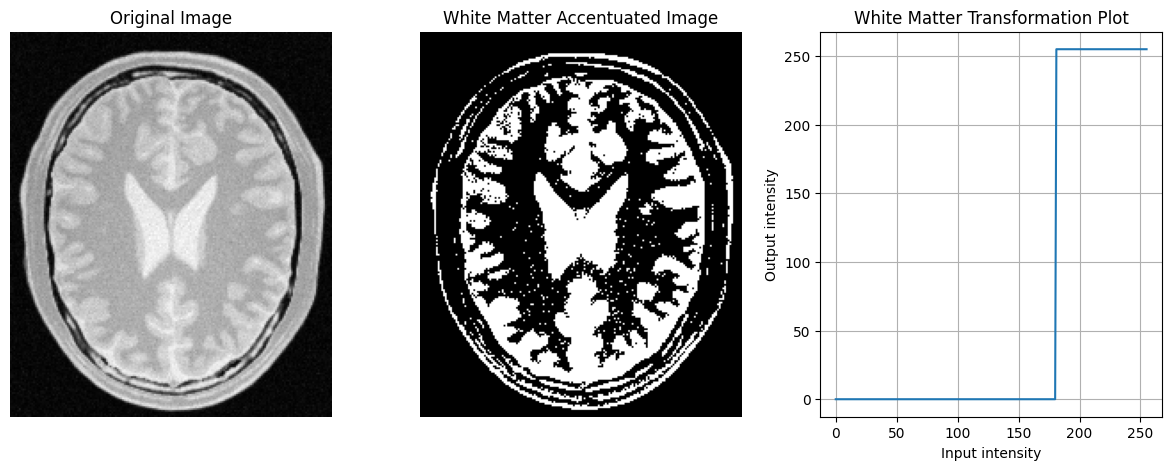

In [75]:
t1 = np.linspace(0, 0, 181-0).astype('uint8')
t2 = np.linspace(255, 255, 255 - 180).astype('uint8')

gm_transform = np.concatenate((t1, t2), axis=0).astype('uint8')
assert len(gm_transform) == 256

transformed = cv.LUT(brain, gm_transform)
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(brain, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 3, 2)
plt.imshow(transformed, cmap='gray')
plt.title('White Matter Accentuated Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.plot(gm_transform, label=None)
plt.title("White Matter Transformation Plot")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.grid(True)

plt.show()

b. Gray Matter

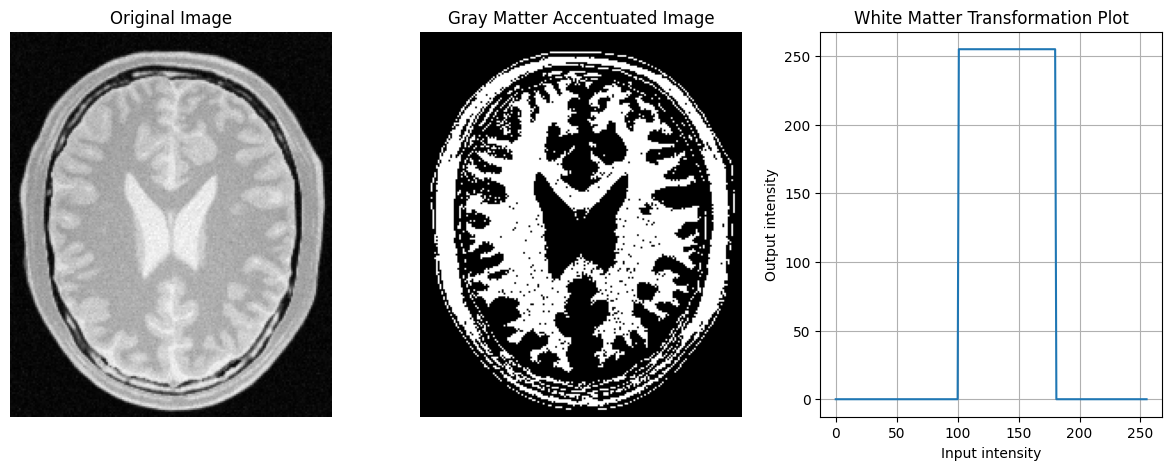

In [74]:
t1 = np.linspace(0, 0, 101-0).astype('uint8')
t2 = np.linspace(255, 255, 180 - 100).astype('uint8')
t3 = np.linspace(0, 0, 255 - 180).astype('uint8')

gm_transform = np.concatenate((t1, t2), axis=0).astype('uint8')
gm_transform = np.concatenate((gm_transform, t3), axis=0).astype('uint8')

assert len(gm_transform) == 256

transformed = cv.LUT(brain, gm_transform)
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(brain, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Transformed image
plt.subplot(1, 3, 2)
plt.imshow(transformed, cmap='gray')
plt.title('Gray Matter Accentuated Image')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.plot(gm_transform, label=None)
plt.title("White Matter Transformation Plot")
plt.xlabel("Input intensity")
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()
plt.show()

# 3. Gamma Correction

### CIE Lab Color Space 

- L*: Represents lightness, ranging from 0 (black) to 100 (white).
- a*: Represents the green-red axis, with negative values indicating green and positive values indicating red.
- b*: Represents the blue-yellow axis, with negative values indicating blue and positive values indicating yellow.

<!-- ![image.png](attachment:image.png) -->

In [85]:
gamma_img = cv.imread('a1images/highlights_and_shadows.jpg', cv.COLOR_BGR2LAB)

a. Applying Gamma Correction

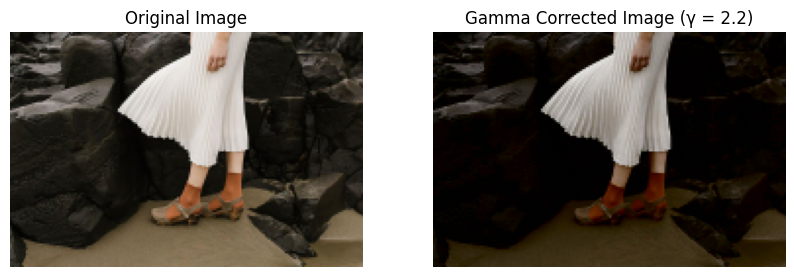

In [93]:
# Split into L, a, b channels
l_channel, a_channel, b_channel = cv2.split(img_lab)

# Apply gamma correction to the L channel (Luminance)
gamma = 2.2  # Example gamma value
l_normalized = l_channel / 255.0
l_gamma_corrected = np.power(l_normalized, gamma)
l_gamma_corrected = (l_gamma_corrected * 255).astype(np.uint8)

# Merge the corrected L channel back with a and b channels
img_lab_corrected = cv2.merge([l_gamma_corrected, a_channel, b_channel])

# Convert back to BGR color space for display
img_corrected = cv2.cvtColor(img_lab_corrected, cv2.COLOR_LAB2BGR)

# Show the original and gamma-corrected images side by side
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gamma_img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img_corrected, cv2.COLOR_BGR2RGB))
plt.title('Gamma Corrected Image (γ = 2.2)')
plt.axis('off')

plt.show()


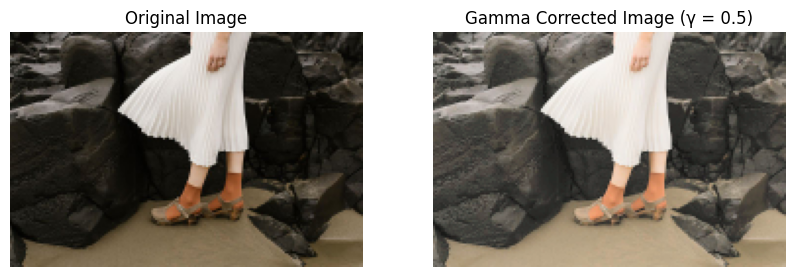

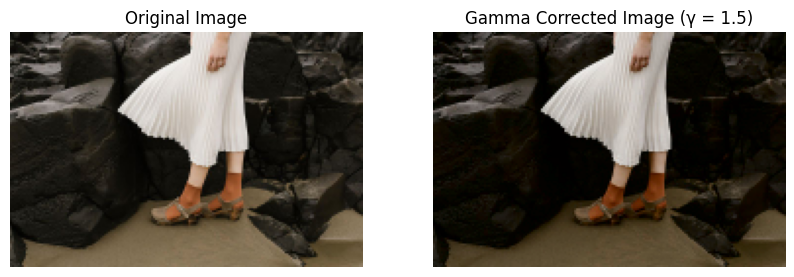

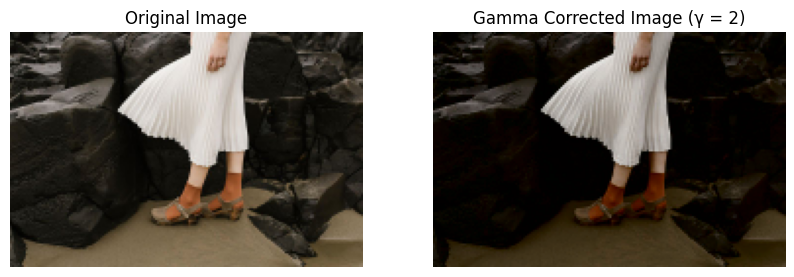

In [99]:
# Split into L, a, b channels
l_channel, a_channel, b_channel = cv2.split(img_lab)

# Apply gamma correction to the L channel (Luminance)
gamma = [0.5,1.5,2] # Example gamma value


for i in gamma:
    l_normalized = l_channel / 255.0
    l_gamma_corrected = np.power(l_normalized, i)
    l_gamma_corrected = (l_gamma_corrected * 255).astype(np.uint8)

    # Merge the corrected L channel back with a and b channels
    img_lab_corrected = cv2.merge([l_gamma_corrected, a_channel, b_channel])

    # Convert back to BGR color space for display
    img_corrected = cv2.cvtColor(img_lab_corrected, cv2.COLOR_LAB2BGR)
        # Show the original and gamma-corrected images side by side
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(gamma_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_corrected, cv2.COLOR_BGR2RGB))
    plt.title(f'Gamma Corrected Image (γ = {i})')
    plt.axis('off')

    plt.show()
# l_normalized = l_channel / 255.0
# l_gamma_corrected = np.power(l_normalized, gamma)
# l_gamma_corrected = (l_gamma_corrected * 255).astype(np.uint8)

# # Merge the corrected L channel back with a and b channels
# img_lab_corrected = cv2.merge([l_gamma_corrected, a_channel, b_channel])

# # Convert back to BGR color space for display
# img_corrected = cv2.cvtColor(img_lab_corrected, cv2.COLOR_LAB2BGR)

# # Show the original and gamma-corrected images side by side
# plt.figure(figsize=(10,5))
# plt.subplot(1, 2, 1)
# plt.imshow(cv2.cvtColor(gamma_img, cv2.COLOR_BGR2RGB))
# plt.title('Original Image')
# plt.axis('off')

# plt.subplot(1, 2, 2)
# plt.imshow(cv2.cvtColor(img_corrected, cv2.COLOR_BGR2RGB))
# plt.title('Gamma Corrected Image (γ = 2.2)')
# plt.axis('off')

# plt.show()
